In [25]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from joblib import load
from matplotlib import pyplot as plt
from math import sqrt



In [27]:
# check the sklearn version to ensure compatibility
print(f"Using scikit-learn version: {sklearn.__version__}")
if sklearn.__version__[:4] != '1.4.':  # assuming version 1.4.x is required
    raise Exception("This script requires scikit-learn version 1.4.x")

model_path = 'best_model2.joblib'
model = load(model_path)

url = "miami-housing.csv"
data = pd.read_csv(url)

# prepare data features and target variable
X = data[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'structure_quality']]
y = data['SALE_PRC']

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using scikit-learn version: 1.4.2


In [28]:
# predict with the model and evaluate outputs
y_pred = model.predict(X_test)
print("Mean absolute error:", sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 score:", r2_score(y_test, y_pred))

Mean absolute error: 95832.85641109046
R^2 score: 0.9067336326614748


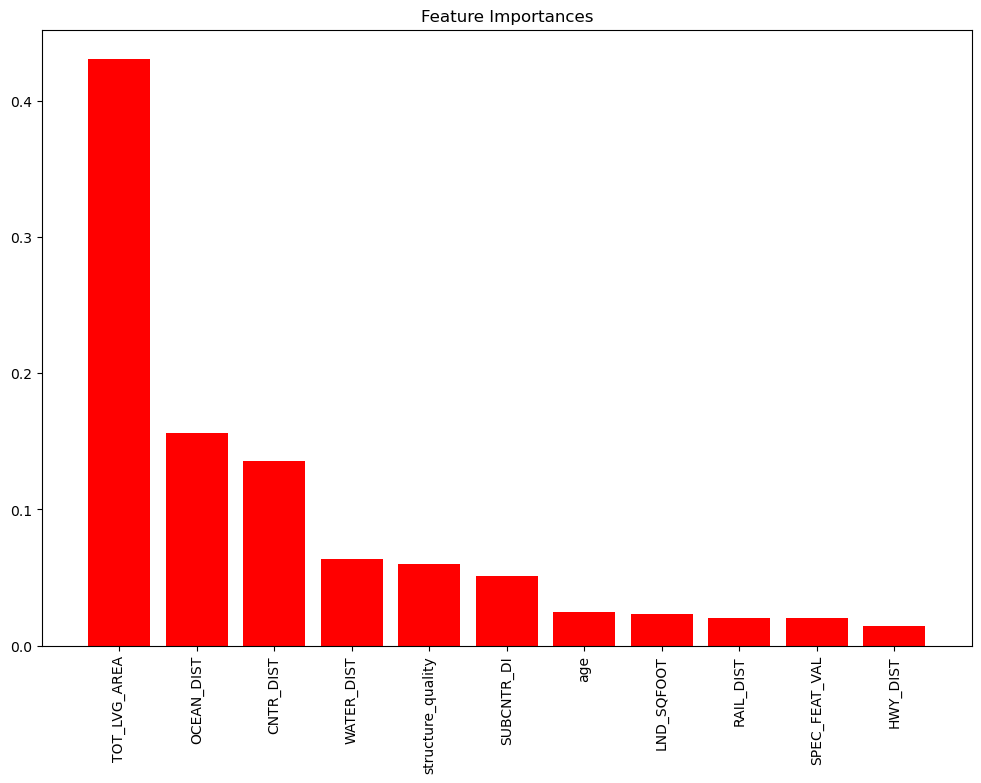

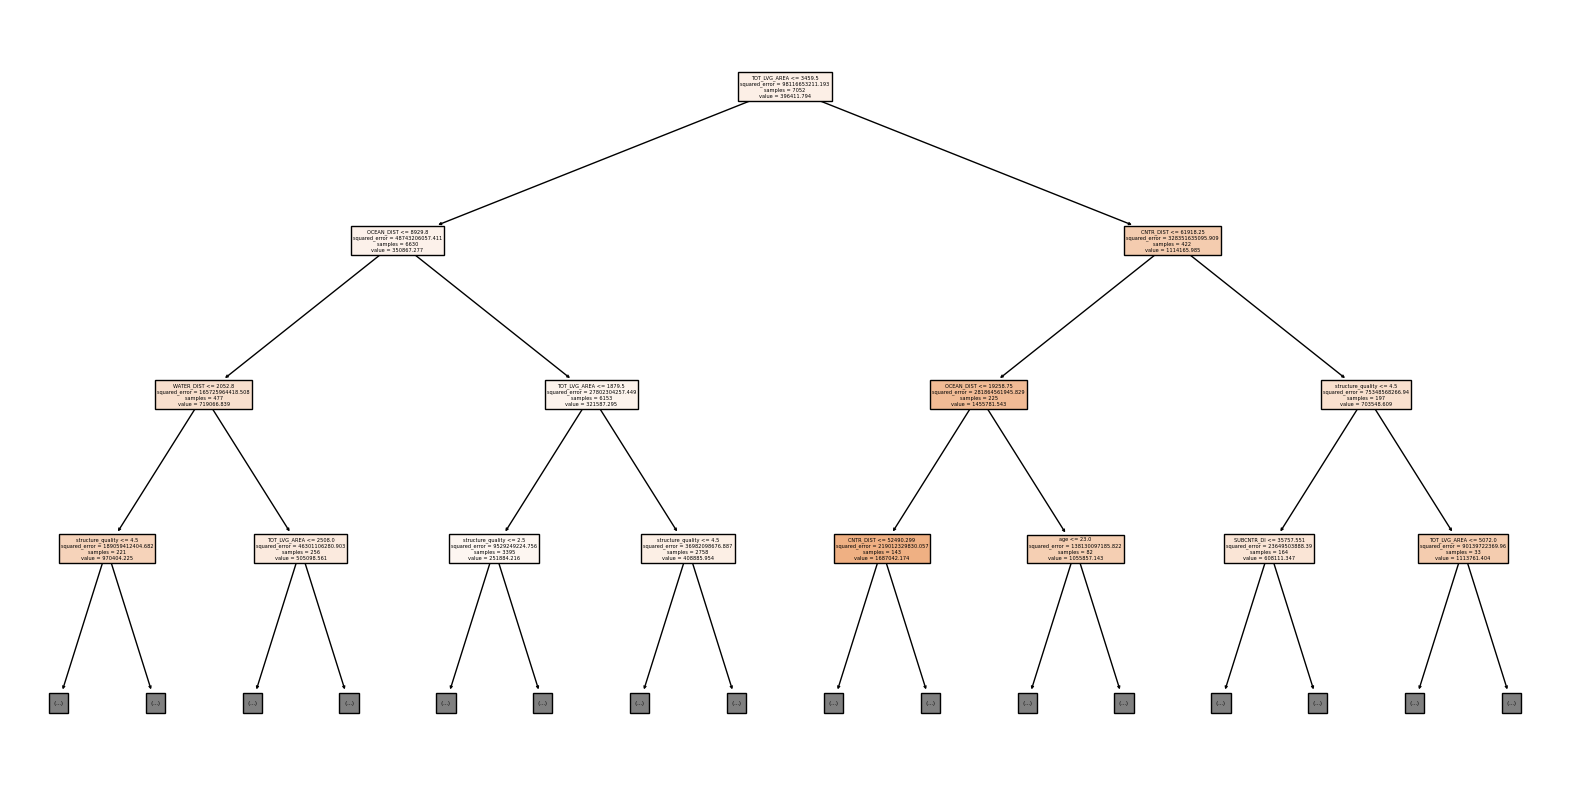

In [29]:
# access randomforestregressor directly for feature importance visualization
random_forest = model.named_steps['regressor']

# plot feature importances
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# visualize a single tree from the forest
estimator = random_forest.estimators_[0]  # get the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

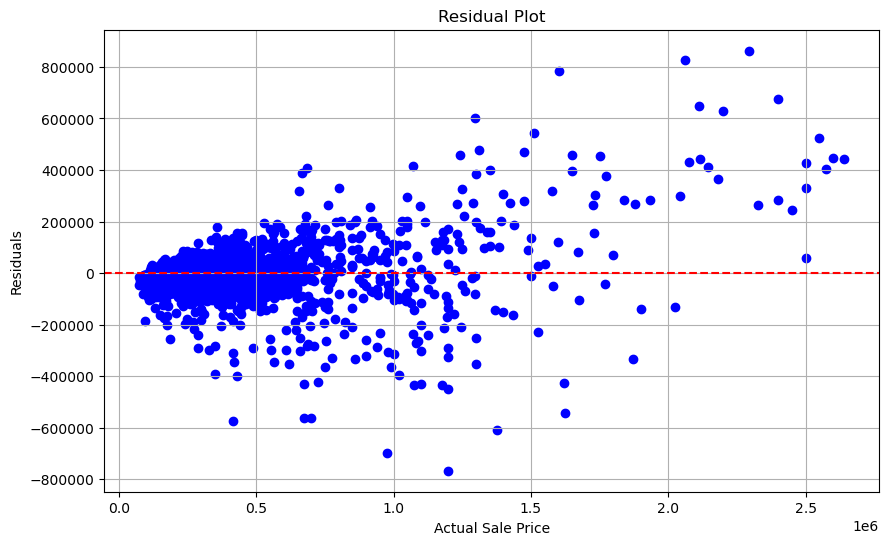

In [30]:
# plot residuals to analyze prediction errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()